In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn
from mar_model import MAR

ImportError: No module named mar_c

In [2]:
# Model Setup
order = 4
nstates = 2

switch_ar = False
switch_sd = False
switch_mean = True

In [3]:
# Load the dataset from Kim and Nelson's website
import requests
f = requests.get('http://econ.korea.ac.kr/~cjkim/MARKOV/data/gdp4795.prn')

# Hamilton's 1989 GNP dataset: Quarterly, 1947.1 - 1995.3
data = pd.DataFrame(
    [float(line) for line in f.content.split('\n')[:-3]],
    index=pd.date_range('1947-01-01', '1995-07-01', freq='QS'),
    columns=['gnp']
)
data['dlgnp'] = np.log(data['gnp']).diff()*100
data = data['1952-01-01':'1984-10-01']

# NBER recessions
from pandas.io.data import DataReader
from datetime import datetime
usrec = DataReader('USREC', 'fred', start=datetime(1952, 1, 1), end=datetime(1984, 12, 1))

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

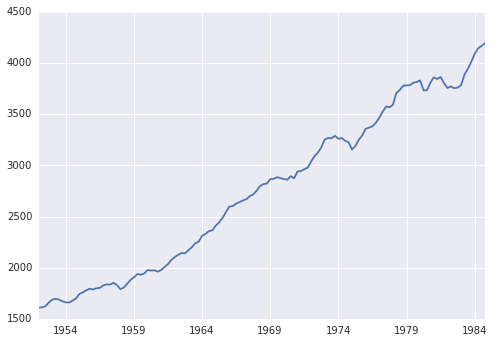

In [11]:
data.gnp.plot()

In [12]:
# Set the initial probability values
# see the file's docstring for more information
# In this case, we have the following transition matrix:
# | p_11 p_21 |
# | p_12 p_22 |
# where p_ij is the probability of transitioning from
# state i to state j
# Then the initial transition probabilities should be
# *the first row* of that matrix, i.e. it should be
# | p_11 p_21 |
init_trans_prob = np.r_[0.75, 0.1]
# so I am saying that p_11 = 0.75 and p_22 = 0.9
# i.e. there is a 75% probability of staying in state 1
# if you are already there and a 90% probability of staying
# in state 2 if you are already there.

# Set the full initial parameters array
initial_params = np.array(np.r_[
   np.log(init_trans_prob / (1 - init_trans_prob)),  # transition probabilities (transformed)
   0, 0, 0, 0, # AR parameters
   -np.log(0.8),   # standard deviation (transformed)
   -0.2, 1.0   # Means
])

# Estimate the parameters via MLE
res = mod.fit(initial_params, method='bfgs');
params = res.params

# Transform the unconstrained parameters to interpretable parameters
final_params = params.copy()
final_params[0:2] = np.exp(final_params[0:2]) / (1 + np.exp(final_params[0:2])) # transition probabilities
final_params[6] = np.exp(-final_params[6]) # Standard deviation

NameError: name 'mod' is not defined